# Keras: Boston House prices

we will attempt the Boston House prices regression problem

first, we import our main math stuff

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-pastel')
import math

now, we load our dataset

In [2]:
from keras.datasets import boston_housing

# load data
(x_data, y_data), (x_test, y_test) = boston_housing.load_data()

print('training data shape:', x_data.shape)

57344/57026 [==============================] - 0s 2us/step
training data shape: (404, 13)


let's do a sanity check on the data

In [8]:
print('training data shape:', x_data.shape)

training data shape: (404, 13)


now, we're going to prepare our data

In [6]:
import keras

# feature normalization
mean = x_data.mean(axis=0)
x_data -= mean
std = x_data.std(axis=0)
x_data /= std
x_test -= mean
x_test /= std

and now prepare our model:

In [55]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(96, activation='selu', input_shape=(x_data.shape[1],)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(64, activation='selu'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model

model evaluation using K-Fold cross validation

performing K-fold cross validation: 4 splits, 400 epochs...


Training:  46%|████▌     | 92/200 [03:21<03:55,  2.18s/it]
Epoch: 92 - loss: 9.145, mean_absolute_error: 2.267:  59%|█████▉    | 240/404 [03:13<02:11,  1.24it/s]
Training:   6%|▌         | 11/200 [03:13<55:16, 17.55s/it]
Epoch: 11 - loss: 8.456, mean_absolute_error: 2.457:   4%|▍         | 16/404 [03:12<1:17:39, 12.01s/it]


Text(0.5, 0, 'validation mae')

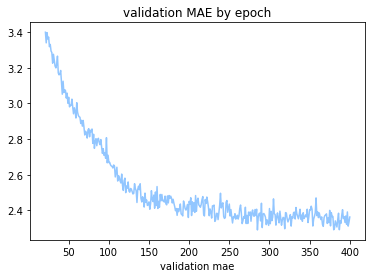

In [64]:
from sklearn.model_selection import KFold
from keras_tqdm import TQDMNotebookCallback as tqdm_cb

kfold_epochs = 400
kfold_splits = 4
mae_history = []

print(f'performing K-fold cross validation: {kfold_splits} splits, {kfold_epochs} epochs...')

kfold = KFold(n_splits=kfold_splits, shuffle=True)
for train_i, val_i in kfold.split(x_data):
    model = build_model()
    hist = model.fit(x_data[train_i], y_data[train_i], validation_data=(x_data[val_i], y_data[val_i]), epochs=kfold_epochs, batch_size=16, verbose=0, callbacks=[tqdm_cb()])

    mae_history.append(hist.history['val_mean_absolute_error'])

# get the mean of each step across all k runs
mae_history_np = np.array(mae_history)
mean_mae_history = np.mean(mae_history, axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
first_plot_epoch = 20
ax.plot(range(first_plot_epoch + 1, mean_mae_history.shape[0] + 1), mean_mae_history[first_plot_epoch:])
ax.set_title("validation MAE by epoch")
ax.set_xlabel("epochs")
ax.set_xlabel("validation mae")

and now, we train our model

In [66]:
from keras_tqdm import TQDMNotebookCallback as tqdm_cb

batch_size = 16
epochs = 200

model.summary()
model.fit(x_data, y_data,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          callbacks=[tqdm_cb()])

test_mse, test_mae = model.evaluate(x_test, y_test, verbose=0)
print('Test mse:', test_mse)
print('Test mae:', test_mae)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_496 (Dense)            (None, 96)                1344      
_________________________________________________________________
dropout_58 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_497 (Dense)            (None, 64)                6208      
_________________________________________________________________
dropout_59 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_498 (Dense)            (None, 1)                 65        
Total params: 7,617
Trainable params: 7,617
Non-trainable params: 0
_________________________________________________________________



Test mse: 17.61159724815219
Test mae: 2.8688393013150084
